In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [40]:
data = pd.read_excel('problem2data.xlsx')
data.head(10)

,student_id,work_experience,entrance_score,college_gpa,absence,hometown_id,course_grade
0,18865961,0,72,4.0,2,48,D
1,83400910,1,65,2.5,6,45,D
2,40962872,1,46,2.0,5,3,C
3,67656558,0,17,1.0,4,21,B
4,30092612,0,49,2.0,0,37,F
5,38500415,1,64,3.9,6,8,C
6,11863658,0,44,3.6,6,51,F
7,35566680,0,52,1.0,0,50,B
8,17100059,0,52,3.9,3,4,C
9,60138076,1,49,4.0,1,7,F


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 7 columns):
student_id         10079 non-null int64
work_experience    10079 non-null int64
entrance_score     10079 non-null int64
college_gpa        10079 non-null float64
absence            10079 non-null int64
hometown_id        10079 non-null int64
course_grade       10079 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 551.3+ KB


In [10]:
data.isna().any()

student_id         False
work_experience    False
entrance_score     False
college_gpa        False
absence            False
hometown_id        False
course_grade       False
dtype: bool

# Subproblem 1

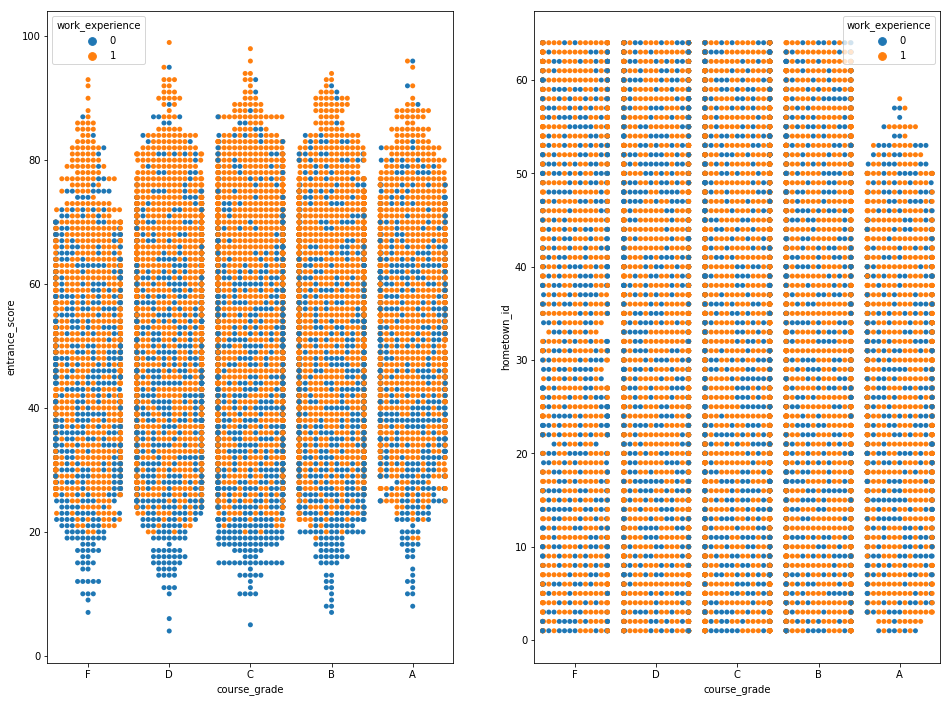

In [24]:
fig = plt.figure(figsize=[16,12])
ax1 = fig.add_subplot(121)
ax1 = sns.swarmplot(x="course_grade", y="entrance_score", hue="work_experience", data=data)
ax2 = fig.add_subplot(122)
ax2 = sns.swarmplot(x="course_grade", y="hometown_id", hue="work_experience", data=data)
plt.show()

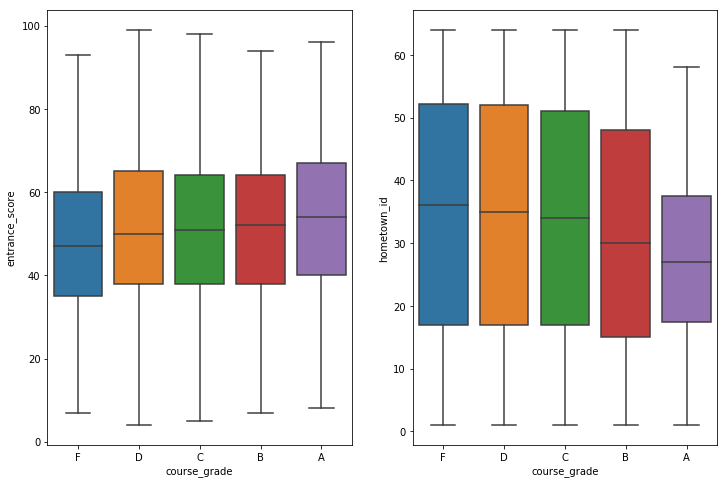

In [30]:
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x="course_grade", y="entrance_score", data=data)
ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(x="course_grade", y="hometown_id", data=data)
plt.show()

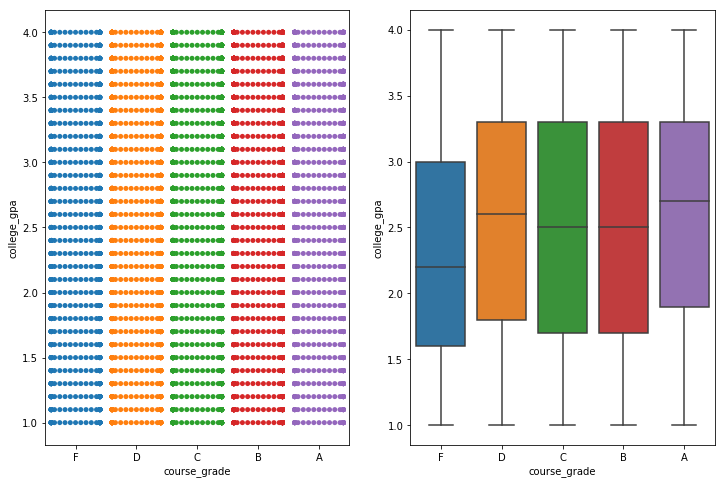

In [32]:
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(121)
ax1 = sns.swarmplot(x="course_grade", y="college_gpa", data=data)
ax1 = fig.add_subplot(122)
ax1 = sns.boxplot(x="course_grade", y="college_gpa", data=data)
plt.show()

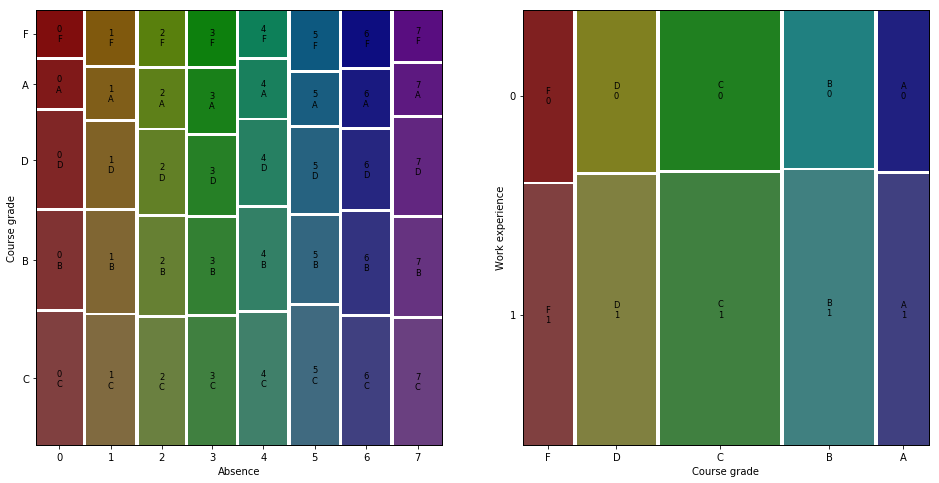

In [4]:
fig = plt.figure(figsize=[16,8])
ax1 = fig.add_subplot(121)
mosaic(data[['absence','course_grade']].sort_values('absence',ascending=True),['absence','course_grade'],gap=0.01,ax=ax1)
ax1.set_xlabel('Absence')
ax1.set_ylabel('Course grade')
ax2 = fig.add_subplot(122)
mosaic(data[['course_grade','work_experience']].sort_values('course_grade',ascending=False),['course_grade','work_experience'],gap=0.01,ax=ax2)
ax2.set_xlabel('Course grade')
ax2.set_ylabel('Work experience')
plt.show()

# Subproblem 2

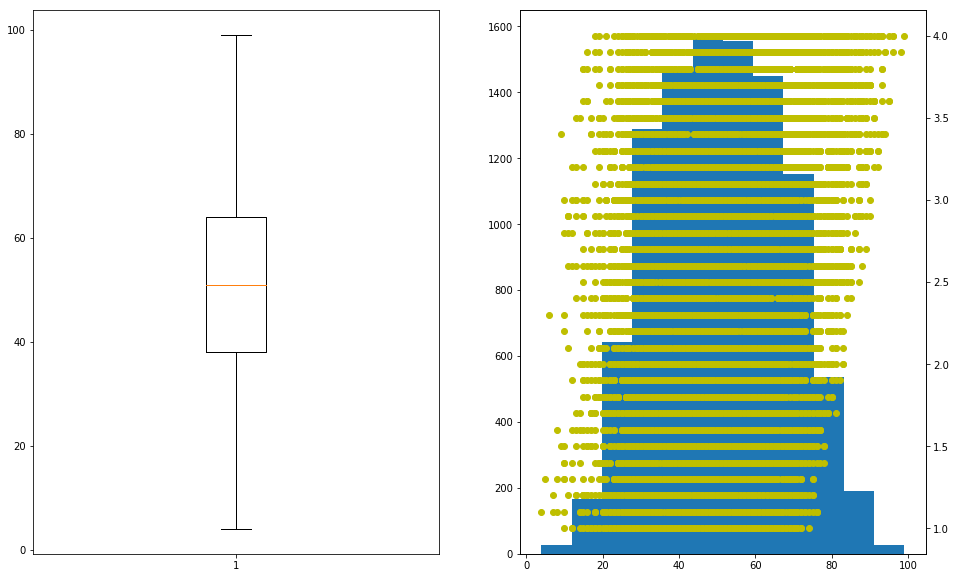

In [57]:
fig = plt.figure(figsize=[16,10])
ax1 = fig.add_subplot(121)
ax1.boxplot(x=data.entrance_score)
ax2 = fig.add_subplot(122)
ax2.hist(x=data.entrance_score, bins=12)
ax3 = ax2.twinx()
ax3.scatter(x=data.entrance_score, y=data.college_gpa, color='y')
plt.show()

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


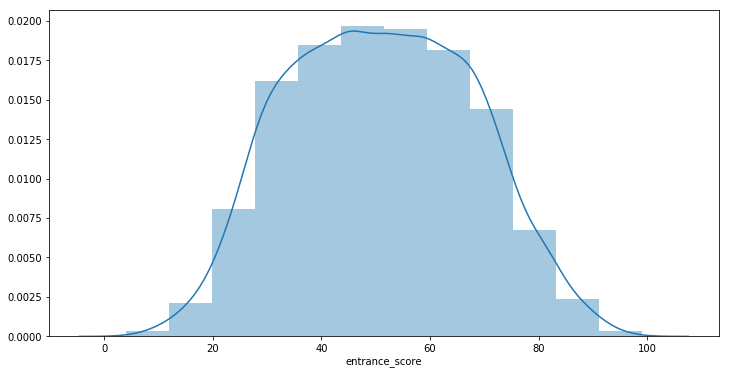

In [9]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax = sns.distplot(data.entrance_score,bins=12)
plt.show()

# Subproblem 3 

In [6]:
bins = [0,40,80,np.inf]
names = ['Poor','Average','Good']
data['entrance_score_range'] = pd.cut(data['entrance_score'], bins, labels = names)
data.head(10)

,student_id,work_experience,entrance_score,college_gpa,absence,hometown_id,course_grade,entrance_score_range
0,18865961,0,72,4.0,2,48,D,Average
1,83400910,1,65,2.5,6,45,D,Average
2,40962872,1,46,2.0,5,3,C,Average
3,67656558,0,17,1.0,4,21,B,Poor
4,30092612,0,49,2.0,0,37,F,Average
5,38500415,1,64,3.9,6,8,C,Average
6,11863658,0,44,3.6,6,51,F,Average
7,35566680,0,52,1.0,0,50,B,Average
8,17100059,0,52,3.9,3,4,C,Average
9,60138076,1,49,4.0,1,7,F,Average


In [5]:
grouped = data.groupby('entrance_score_range')

In [8]:
grouped['course_grade'].apply(lambda x: pd.Series.value_counts(x)/len(x))

entrance_score_range   
Poor                  C    0.302303
                      B    0.224671
                      D    0.208553
                      F    0.155263
                      A    0.109211
Average               C    0.310226
                      B    0.233383
                      D    0.202707
                      A    0.136692
                      F    0.116992
Good                  C    0.295630
                      B    0.241645
                      D    0.205656
                      A    0.169666
                      F    0.087404
Name: course_grade, dtype: float64